In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import glob
from os.path import join
from os import listdir
import pandas as pd
import scipy.constants as constants
from sys import float_info
import matplotlib as mpl
#mpl.rcParams.update({'font.size': 18, 'font.family': 'sans-serif'}) # defines the graph template - fonts
from cycler import cycler

num_plots = 5
#color = mpl.cm.nipy_spectral(np.linspace(0, 1, 50)) #so this gives 50 colours for the figure legend
#mpl.rcParams['axes.prop_cycle'] = cycler('color', color)
print('ready')

ready


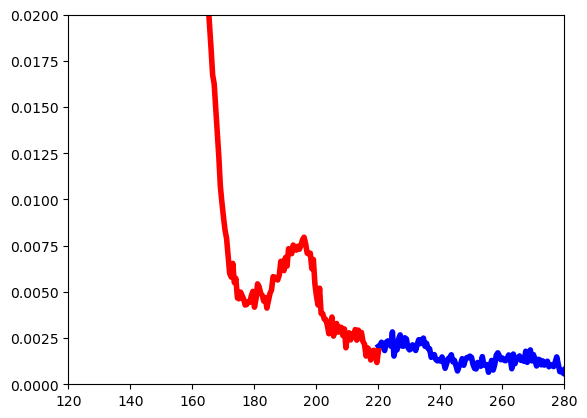

In [3]:
export_path='data/exports'
path = 'data/raw_full spectrum'

column_names = ['Lambda','Keith/nA','Ch1/volts','Ch2/volts','Ch3/volts','Z_Motor','Beam_current','temperature','GC_Pres','Time','UBX_x','UBX_y']

files =  listdir(path)
BkGd_files = (files[:-4])
sample_files = (files[4:])
df_long = pd.DataFrame()
df_short = pd.DataFrame()

average_BkGd_long =pd.DataFrame()
average_BkGd_short =pd.DataFrame()
average_sample_long =pd.DataFrame()
average_sample_short =pd.DataFrame()

BkGd_long_a = pd.read_csv(join(path, BkGd_files[0]) , header=[15],delimiter=r"\s+")
BkGd_long_b = pd.read_csv(join(path, BkGd_files[1]) , header=[15],delimiter=r"\s+")
BkGd_short_a = pd.read_csv(join(path, BkGd_files[2]) , header=[15],delimiter=r"\s+")
BkGd_short_b = pd.read_csv(join(path, BkGd_files[3]) , header=[15],delimiter=r"\s+")

sample_long_a = pd.read_csv(join(path, sample_files[0]) , header=[15],delimiter=r"\s+")
sample_long_b = pd.read_csv(join(path, sample_files[1]) , header=[15],delimiter=r"\s+")
sample_short_a = pd.read_csv(join(path, sample_files[2]) , header=[15],delimiter=r"\s+")
sample_short_b = pd.read_csv(join(path, sample_files[3]) , header=[15],delimiter=r"\s+")

BkGd_long_a.columns = column_names
BkGd_long_b.columns = column_names
BkGd_short_a.columns = column_names
BkGd_short_b.columns = column_names

sample_long_a.columns = column_names
sample_long_b.columns = column_names
sample_short_a.columns = column_names
sample_short_b.columns = column_names

BkGd_long_a ['nor_signal'] = ((180/BkGd_long_a ['Beam_current'])*BkGd_long_a ['Keith/nA'])
BkGd_long_b ['nor_signal'] = ((180/BkGd_long_b ['Beam_current'])*BkGd_long_b ['Keith/nA'])
BkGd_short_a ['nor_signal'] = ((180/BkGd_short_a ['Beam_current'])*BkGd_short_a ['Keith/nA'])
BkGd_short_b ['nor_signal'] = ((180/BkGd_short_b ['Beam_current'])*BkGd_short_b ['Keith/nA'])

#plt.plot(BkGd_long_b['Lambda'],BkGd_long_b ['nor_signal'])
#plt.show()

sample_long_a ['nor_signal'] = ((180/sample_long_a ['Beam_current'])*sample_long_a ['Keith/nA'])
sample_long_b ['nor_signal'] = ((180/sample_long_b ['Beam_current'])*sample_long_b ['Keith/nA'])
sample_short_a ['nor_signal'] = ((180/sample_short_a ['Beam_current'])*sample_short_a ['Keith/nA'])
sample_short_b ['nor_signal'] = ((180/sample_short_b ['Beam_current'])*sample_short_b ['Keith/nA'])

average_BkGd_long['wavelength'] = (BkGd_long_a['Lambda'])
average_BkGd_long['av_BkGd_signal'] = (BkGd_long_a['nor_signal']+BkGd_long_b['nor_signal'])/2
average_BkGd_short['wavelength'] = (BkGd_short_a['Lambda'])
average_BkGd_short['av_BkGd_signal'] = (BkGd_short_a['nor_signal']+BkGd_short_b['nor_signal'])/2

average_sample_long['wavelength'] = (sample_long_a['Lambda'])
average_sample_long['av_sample_signal'] = (sample_long_a['nor_signal']+sample_long_b['nor_signal'])/2
average_sample_short['wavelength'] = (sample_short_a['Lambda'])
average_sample_short['av_sample_signal'] = (sample_short_a['nor_signal']+sample_short_b['nor_signal'])/2

df_long['absorbance'] = np.log10(average_BkGd_long['av_BkGd_signal']/average_sample_long['av_sample_signal'], where= (average_BkGd_long['av_BkGd_signal']/average_sample_long['av_sample_signal']) > 0) #making sure not to take a log of -ve numbers
df_long['wavelength'] = (average_BkGd_long['wavelength'])  
df_short['absorbance'] = np.log10(average_BkGd_short['av_BkGd_signal']/average_sample_short['av_sample_signal'], where= (average_BkGd_short['av_BkGd_signal']/average_sample_short['av_sample_signal']) > 0) #making sure not to take a log of -ve numbers
df_short['wavelength'] = (average_BkGd_short['wavelength'])  

index = df_short.index[df_short['wavelength'] == 117.0][0]
df_short = df_short.iloc[index:]
df_short = df_short.reset_index(drop=True)

filtered_df_long = df_long[(df_long['wavelength'] >= 210) & (df_long['wavelength'] <= 220)]
average_abs_long = filtered_df_long['absorbance'].mean()

filtered_df_short = df_short[(df_short['wavelength'] >= 210) & (df_short['wavelength'] <= 220)]
average_abs_short = filtered_df_short['absorbance'].mean()

difference = average_abs_short - average_abs_long
df_short['adj_absorbance'] = df_short['absorbance']-difference

index = df_long.index[df_long['wavelength'] == 220.0][0]
df_long = df_long.iloc[index:]
df_long = df_long.reset_index(drop=True)


plt.plot(df_long['wavelength'],df_long['absorbance'],'b', linewidth=4)
plt.plot(df_short['wavelength'],df_short['adj_absorbance'],'r', linewidth=4)
plt.ylim(0,0.02)
plt.xlim(120,280)

plt.show()



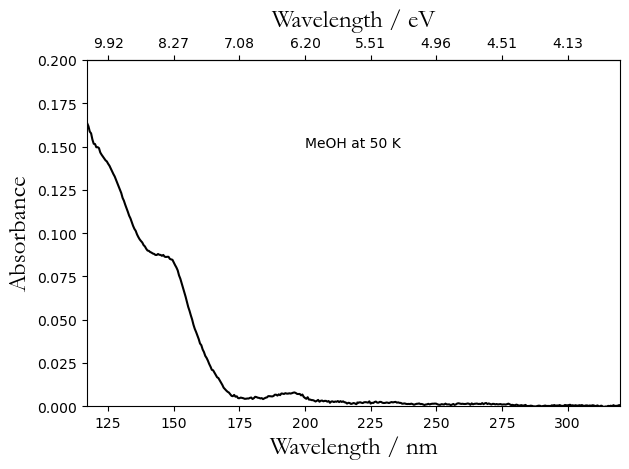

In [4]:
# Function to prevent zero values in an array
def preventDivisionByZero(some_array):
    corrected_array = some_array.copy()
    for i, entry in enumerate(some_array):
        # If element is zero, set to some small value
        if abs(entry) < float_info.epsilon:
            corrected_array[i] = float_info.epsilon
    
    return corrected_array

# Converting wavelength (nm) to energy (eV)
def WLtoE(wl):
    # Prevent division by zero error
    wl = preventDivisionByZero(wl)

    # E = h*c/wl            
    h = constants.h         # Planck constant
    c = constants.c         # Speed of light
    J_eV = constants.e      # Joule-electronvolt relationship
    
    wl_nm = wl * 10**(-9)   # convert wl from nm to m
    E_J = (h*c) / wl_nm     # energy in units of J
    E_eV = E_J / J_eV       # energy in units of eV
    
    return E_eV  

# Converting energy (eV) to wavelength (nm)
def EtoWL(E):
    # Prevent division by zero error
    E = preventDivisionByZero(E)
    
    # Calculates the wavelength in nm
    return constants.h * constants.c / (constants.e * E) * 10**9

fig, ax1 = plt.subplots()

ax1.plot(df_long['wavelength'],df_long['absorbance'],'k-')
ax1.plot(df_short['wavelength'],df_short['adj_absorbance'], 'k-')

ax1.set_ylabel('Absorbance',family="garamond", fontsize=18)
ax1.set_xlabel('Wavelength / nm',family="garamond", fontsize=18)
plt.ylim(0,0.2)
ax1.set_xlim(117,320)

# Create the second x-axis on which the energy in eV will be displayed
ax2 = ax1.secondary_xaxis('top', functions=(WLtoE, EtoWL))
ax2.set_xlabel('Wavelength / eV',family="garamond", fontsize=18, labelpad=7)

# Get ticks from ax1 (wavelengths)
wl_ticks = ax1.get_xticks()
wl_ticks = preventDivisionByZero(wl_ticks)

# Based on the ticks from ax1 (wavelengths), calculate the corresponding energies in eV
E_ticks = WLtoE(wl_ticks)

# Set the ticks for ax2 (Energy)
ax2.set_xticks(E_ticks)

# Allow for two decimal places on ax2 (Energy)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#ax1.legend()
ax1.annotate('MeOH at 50 K', (200,0.150))
plt.tight_layout()
plt.show()
